
# Introduction
소개 Ultralytics YOLO11는 호평을 받고 있는 실시간 물체 감지 및 이미지 분할 모델의 최신 버전입니다.

Ultralytics 두 가지 YOLO 라이선스( AGPL-3.0 및 Enterprise)를 제공합니다. GitHub에서 YOLO 살펴보기.

## 


# Setup

pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ganzooo/colab_keti_inference_code/blob/main/YOLO11_Tutorial.ipynb)]

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
Setup complete ✅ (24 CPUs, 125.6 GB RAM, 918.5/1228.9 GB disk)


# 1. Predict

YOLO11 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLO11 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [2]:
# Run inference on an image with YOLO11n
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /work/10_OTHERS/colab_keti_inference_code/zidane.jpg: 384x640 2 persons, 1 tie, 63.8ms
Speed: 2.3ms preprocess, 63.8ms inference, 125.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /work/01_DETECTION/ultralytics/runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/212889447-69e5bdf1-5800-4e29-835e-2ed2336dede2.jpg" width="600">

# 2. Val
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits. The latest YOLO11 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLO11 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [4]:
# Download COCO val
import os
import torch

if not os.path.exists('datasets'):
    torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
    !unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip    



In [5]:
# Validate YOLO11n on COCO8 val
!yolo val model=yolo11n.pt data=coco8.yaml

Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2572.9±498.2 MB/s, size: 54.0 KB)
val: Scanning /work/01_DETECTION/datasets/coco8/labels/val.cache... 4 images, 0 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          4         17      0.569       0.85      0.847      0.632
                person          3         10      0.554        0.6      0.587      0.273
                   dog          1          1      0.547          1      0.995      0.697
                 horse          1          2      0.528          1      0.995      0.674
              elephant          1          2       0.37        0.5      0.516      0.256
              umbrella          1          1      0.568          1      0.995      0.995
          potted plant          

# 3. Train

Train YOLO11 on coco 4 images.

In [7]:
# Train YOLO11n on COCO8 for 3 epochs
!yolo train model=yolo11n.pt data=coco8.yaml epochs=3 imgsz=640

New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train7, nbs=64, nms=False, opset=None, optimize=

# 4. Export

Export a YOLO model to any supported format below with the `format` argument, i.e. `format=onnx`. See [Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format | `format` Argument | Model | Metadata | Arguments |
|--------|-----------------|-------|----------|------------|
| [PyTorch](https://pytorch.org/) | - | `yolo11n.pt` | ✅ | - |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript) | `torchscript` | `yolo11n.torchscript` | ✅ | `imgsz`, `batch`, `optimize`, `half`, `nms`, `device` |
| [ONNX](https://docs.ultralytics.com/integrations/onnx) | `onnx` | `yolo11n.onnx` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `opset`, `simplify`, `nms`, `device` |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino) | `openvino` | `yolo11n_openvino_model/` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `int8`, `nms`, `fraction`, `device`, `data` |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt) | `engine` | `yolo11n.engine` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `int8`, `simplify`, `nms`, `fraction`, `device`, `data`, `workspace` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml) | `coreml` | `yolo11n.mlpackage` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `device` |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model` | `yolo11n_saved_model/` | ✅ | `imgsz`, `batch`, `int8`, `keras`, `nms`, `device` |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef) | `pb` | `yolo11n.pb` | ❌ | `imgsz`, `batch`, `device` |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite) | `tflite` | `yolo11n.tflite` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `fraction`, `device`, `data` |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu) | `edgetpu` | `yolo11n_edgetpu.tflite` | ✅ | `imgsz`, `device` |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs) | `tfjs` | `yolo11n_web_model/` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `device` |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle) | `paddle` | `yolo11n_paddle_model/` | ✅ | `imgsz`, `batch`, `device` |
| [MNN](https://docs.ultralytics.com/integrations/mnn) | `mnn` | `yolo11n.mnn` | ✅ | `imgsz`, `batch`, `half`, `int8`, `device` |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn) | `ncnn` | `yolo11n_ncnn_model/` | ✅ | `imgsz`, `batch`, `half`, `device` |
| [IMX500](https://docs.ultralytics.com/integrations/sony-imx500) | `imx` | `yolov8n_imx_model/` | ✅ | `imgsz`, `int8`, `fraction`, `device`, `data` |
| [RKNN](https://docs.ultralytics.com/integrations/rockchip-rknn) | `rknn` | `yolo11n_rknn_model/` | ✅ | `imgsz`, `int8`, `batch`, `name`, `device` |

In [8]:
!yolo export model=yolo11n.pt format=torchscript

Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CPU (12th Gen Intel Core(TM) i9-12900K)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

TorchScript: starting export with torch 2.2.0a0+81ea7a4...
TorchScript: export success ✅ 0.7s, saved as 'yolo11n.torchscript' (10.5 MB)

Export complete (2.1s)
Results saved to /work/10_OTHERS/colab_keti_inference_code
Predict:         yolo predict task=detect model=yolo11n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolo11n.torchscript imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


# 5. Python Usage

YOLO11 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLO11 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLO11 Python Docs](https://docs.ultralytics.com/usage/python/).

In [14]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolo11n.yaml')  # build a new model from scratch
model = YOLO('yolo11n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='coco8.yaml', epochs=3)  # train the model
results = model.val(plots=True)  # evaluate model performance on the validation set
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
results = model.export(format='onnx')  # export the model to ONNX format

New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train12, nbs=64, nms=False, opset=None, optimize=Fa

train: Scanning /work/01_DETECTION/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1023.0±246.9 MB/s, size: 54.0 KB)


val: Scanning /work/01_DETECTION/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to /work/01_DETECTION/ultralytics/runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/05/12 07:06:05 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/12 07:06:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/05/12 07:06:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/05/12 07:06:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


MLflow: logging run_id(991029e0ac4b4f1facbcfe729d709d1e) to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /work/01_DETECTION/ultralytics/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /work/01_DETECTION/ultralytics/runs/detect/train12
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.824G     0.9658      2.348      1.285         18        640: 100%|██████████| 1/1 [00:00<00:00, 22.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 48.39it/s]

                   all          4         17      0.583       0.85      0.878      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3     0.848G       1.25      3.266      1.644         22        640: 100%|██████████| 1/1 [00:00<00:00, 23.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 52.72it/s]

                   all          4         17      0.587       0.85      0.886      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.848G       1.35      3.638      1.613         24        640: 100%|██████████| 1/1 [00:00<00:00, 24.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 52.20it/s]

                   all          4         17      0.591       0.85      0.854      0.634



3 epochs completed in 0.001 hours.
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/detect/train12/weights/last.pt, 5.5MB
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/detect/train12/weights/best.pt, 5.5MB

Validating /work/01_DETECTION/ultralytics/runs/detect/train12/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 67.09it/s]


                   all          4         17      0.582       0.85      0.885       0.65
                person          3         10      0.567        0.6      0.587      0.262
                   dog          1          1      0.549          1      0.995      0.796
                 horse          1          2      0.594          1      0.995      0.674
              elephant          1          2      0.364        0.5      0.745       0.28
              umbrella          1          1       0.57          1      0.995      0.995
          potted plant          1          1       0.85          1      0.995      0.895
Speed: 0.3ms preprocess, 1.1ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /work/01_DETECTION/ultralytics/runs/detect/train12
MLflow: results logged to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOL

val: Scanning /work/01_DETECTION/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.47it/s]


                   all          4         17      0.586       0.85      0.849      0.632
                person          3         10       0.57        0.6      0.591      0.274
                   dog          1          1      0.551          1      0.995      0.697
                 horse          1          2      0.606          1      0.995      0.674
              elephant          1          2      0.365        0.5      0.522      0.259
              umbrella          1          1      0.571          1      0.995      0.995
          potted plant          1          1      0.852          1      0.995      0.895
Speed: 1.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /work/01_DETECTION/ultralytics/runs/detect/train122

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /work/10_OTHERS/colab_keti_inference_code/bus.jpg: 640x480 4 persons, 1 bus, 3.8ms
Speed: 1.6ms preprocess, 3.8ms inference, 0.7ms postprocess per imag

# 6. Tasks

YOLO11 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLO11 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">


## 1. Detection

YOLO11 _detection_ models have no suffix and are the default YOLO11 models, i.e. `yolo11n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train11, nbs=64, nms=False, opset=None, optimize=Fa

train: Scanning /work/01_DETECTION/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1166.1±112.8 MB/s, size: 54.0 KB)


val: Scanning /work/01_DETECTION/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to /work/01_DETECTION/ultralytics/runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/05/12 07:02:26 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/12 07:02:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/05/12 07:02:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/05/12 07:02:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


MLflow: logging run_id(2a3920c2d2504b3fbb69da6e1303b640) to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /work/01_DETECTION/ultralytics/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /work/01_DETECTION/ultralytics/runs/detect/train11
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.797G     0.9658      2.348      1.285         18        640: 100%|██████████| 1/1 [00:00<00:00, 21.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.72it/s]

                   all          4         17      0.583       0.85      0.878      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      0.82G       1.25      3.266      1.644         22        640: 100%|██████████| 1/1 [00:00<00:00, 24.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 49.10it/s]

                   all          4         17      0.587       0.85      0.886      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.822G       1.35      3.638      1.613         24        640: 100%|██████████| 1/1 [00:00<00:00, 24.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 46.83it/s]

                   all          4         17      0.591       0.85      0.854      0.634



3 epochs completed in 0.001 hours.
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/detect/train11/weights/last.pt, 5.5MB
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/detect/train11/weights/best.pt, 5.5MB

Validating /work/01_DETECTION/ultralytics/runs/detect/train11/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 66.21it/s]


                   all          4         17      0.582       0.85      0.885       0.65
                person          3         10      0.567        0.6      0.587      0.262
                   dog          1          1      0.549          1      0.995      0.796
                 horse          1          2      0.594          1      0.995      0.674
              elephant          1          2      0.364        0.5      0.745       0.28
              umbrella          1          1       0.57          1      0.995      0.995
          potted plant          1          1       0.85          1      0.995      0.895
Speed: 0.3ms preprocess, 1.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /work/01_DETECTION/ultralytics/runs/detect/train11
MLflow: results logged to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /work/10_OTHERS/colab_keti_infere

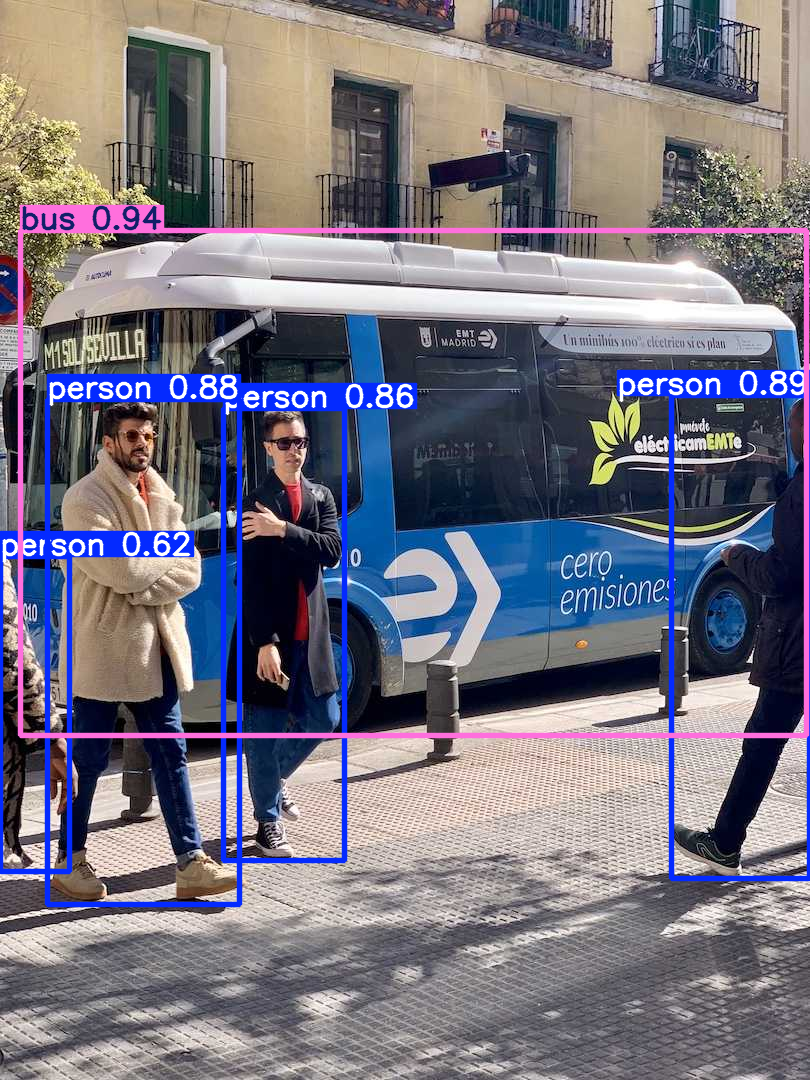

In [13]:
# Load YOLO11n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n.pt')  # load a pretrained YOLO detection model
model.train(data='coco8.yaml', epochs=3)  # train the model
result = model('https://ultralytics.com/images/bus.jpg')[0]  # predict on an image
result.show()

## 2. Segmentation

YOLO11 _segmentation_ models use the `-seg` suffix, i.e. `yolo11n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


100%|██████████| 5.90M/5.90M [00:00<00:00, 42.6MB/s]


New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8-seg.yaml, degrees=0.0, deterministic=True, device=-1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, opti

100%|██████████| 439k/439k [00:00<00:00, 28.3MB/s]
Unzipping /work/01_DETECTION/datasets/coco8-seg.zip to /work/01_DETECTION/datasets/coco8-seg...: 100%|██████████| 25/25 [00:00<00:00, 5993.92file/s]

Dataset download success ✅ (1.6s), saved to /work/01_DETECTION/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7           

Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2623.4±806.0 MB/s, size: 50.0 KB)


train: Scanning /work/01_DETECTION/datasets/coco8-seg/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1543.30it/s]

train: New cache created: /work/01_DETECTION/datasets/coco8-seg/labels/train.cache
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 868.4±134.5 MB/s, size: 54.0 KB)


val: Scanning /work/01_DETECTION/datasets/coco8-seg/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 2509.31it/s]

val: New cache created: /work/01_DETECTION/datasets/coco8-seg/labels/val.cache


Plotting labels to /work/01_DETECTION/ultralytics/runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)


2025/05/12 07:07:00 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/12 07:07:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/05/12 07:07:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/05/12 07:07:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


MLflow: logging run_id(6c1f27b2b0a048aeb3244db17ccb490c) to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /work/01_DETECTION/ultralytics/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /work/01_DETECTION/ultralytics/runs/segment/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3      1.01G      1.087      2.119      2.746      1.358         19        640: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.78it/s]

                   all          4         17      0.802       0.89      0.939      0.666      0.745      0.833      0.822      0.567

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



        2/3      1.14G      1.069       3.38      2.905      1.413         23        640: 100%|██████████| 1/1 [00:00<00:00, 21.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.05it/s]

                   all          4         17      0.784      0.895      0.939      0.663      0.726      0.837      0.822      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3      1.14G      1.186      2.838      3.119      1.446         26        640: 100%|██████████| 1/1 [00:00<00:00, 21.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.85it/s]


                   all          4         17       0.78      0.904      0.939      0.668      0.717      0.842      0.822      0.562

3 epochs completed in 0.001 hours.
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/segment/train/weights/last.pt, 6.1MB
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/segment/train/weights/best.pt, 6.1MB

Validating /work/01_DETECTION/ultralytics/runs/segment/train/weights/best.pt...
Searching for 1 idle GPUs with >= 2048 MiB free memory...
Selected idle CUDA devices [0]
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n-seg summary (fused): 113 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.42it/s]


                   all          4         17      0.799       0.89      0.939      0.667      0.742      0.833      0.822      0.567
                person          3         10      0.818        0.5      0.661        0.3      0.818        0.5      0.616      0.263
                   dog          1          1      0.749          1      0.995      0.895      0.749          1      0.995      0.895
                 horse          1          2      0.624          1      0.995      0.581      0.624          1      0.828        0.2
              elephant          1          2          1      0.843      0.995      0.332      0.657        0.5        0.5       0.25
              umbrella          1          1      0.675          1      0.995      0.995      0.675          1      0.995      0.895
          potted plant          1          1      0.929          1      0.995      0.895      0.929          1      0.995      0.895
Speed: 0.3ms preprocess, 1.2ms inference, 0.0ms loss, 0.4ms postproce

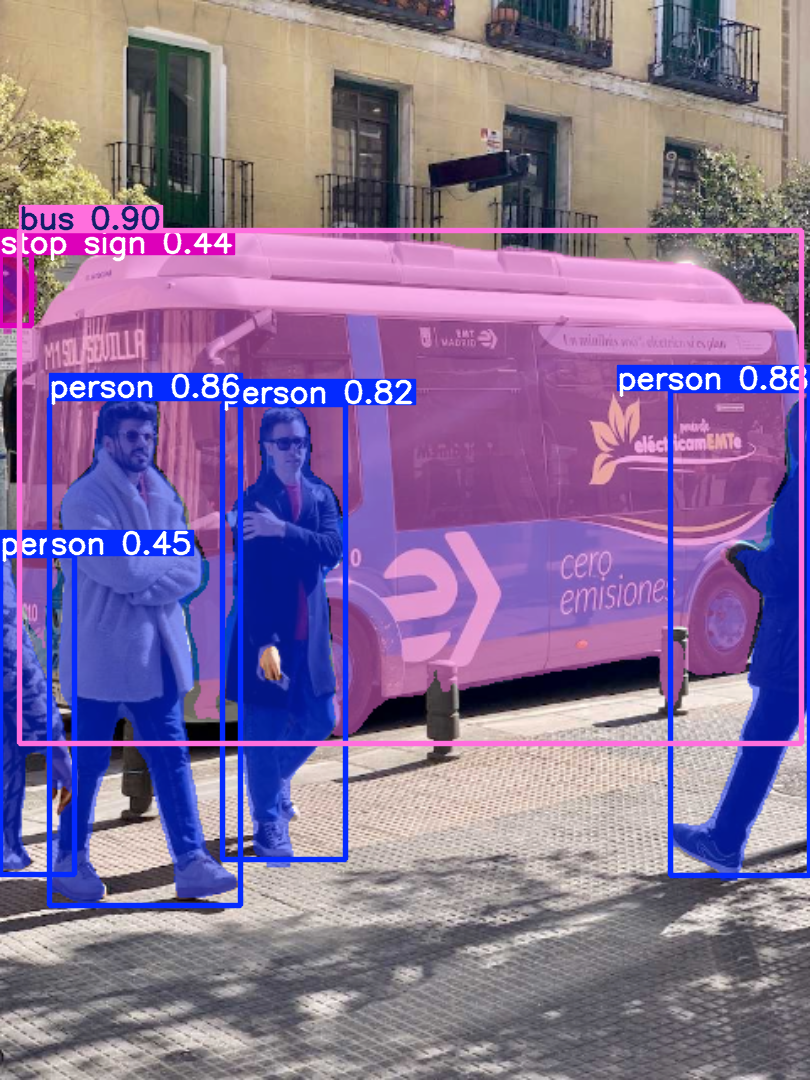

AttributeError: 'Masks' object has no attribute 'plot'. See valid attributes below.

    A class for storing and manipulating detection masks.

    This class extends BaseTensor and provides functionality for handling segmentation masks,
    including methods for converting between pixel and normalized coordinates.

    Attributes:
        data (torch.Tensor | numpy.ndarray): The raw tensor or array containing mask data.
        orig_shape (tuple): Original image shape in (height, width) format.
        xy (List[numpy.ndarray]): A list of segments in pixel coordinates.
        xyn (List[numpy.ndarray]): A list of normalized segments.

    Methods:
        cpu(): Returns a copy of the Masks object with the mask tensor on CPU memory.
        numpy(): Returns a copy of the Masks object with the mask tensor as a numpy array.
        cuda(): Returns a copy of the Masks object with the mask tensor on GPU memory.
        to(*args, **kwargs): Returns a copy of the Masks object with the mask tensor on specified device and dtype.

    Examples:
        >>> masks_data = torch.rand(1, 160, 160)
        >>> orig_shape = (720, 1280)
        >>> masks = Masks(masks_data, orig_shape)
        >>> pixel_coords = masks.xy
        >>> normalized_coords = masks.xyn
    

In [ ]:
# Load YOLO11n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-seg.pt')  # load a pretrained YOLO segmentation model
model.train(data='coco8-seg.yaml', epochs=3)  # train the model
result_seg = model('https://ultralytics.com/images/bus.jpg')[0]  # predict on an image
result_seg.show()  # plot the results

## 3. Classification

YOLO11 _classification_ models use the `-cls` suffix, i.e. `yolo11n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=mnist160, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=F

train: Scanning /work/01_DETECTION/datasets/mnist160/train... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 41.4±19.8 MB/s, size: 0.3 KB)


val: Scanning /work/01_DETECTION/datasets/mnist160/test... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)


2025/05/12 07:09:48 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/12 07:09:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/05/12 07:09:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/05/12 07:09:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


MLflow: logging run_id(7c9ee7d80deb425b9ac8420dd4c36e53) to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /work/01_DETECTION/ultralytics/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to /work/01_DETECTION/ultralytics/runs/classify/train4
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 157.41it/s]

                   all        0.1      0.488



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 153.31it/s]

                   all      0.138      0.512



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 139.00it/s]

                   all     0.0625      0.538



3 epochs completed in 0.000 hours.
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/classify/train4/weights/last.pt, 3.2MB
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/classify/train4/weights/best.pt, 3.2MB

Validating /work/01_DETECTION/ultralytics/runs/classify/train4/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n-cls summary (fused): 47 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /work/01_DETECTION/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: /work/01_DETECTION/datasets/mnist160/test... found 80 images in 10 classes ✅ 
test: /work/01_DETECTION/datasets/mnist160/test... found 80 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 111.29it/s]


                   all      0.138      0.512
Speed: 0.1ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /work/01_DETECTION/ultralytics/runs/classify/train4
MLflow: results logged to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /work/10_OTHERS/colab_keti_inference_code/bus.jpg: 224x224 6 0.38, 9 0.11, 8 0.10, 0 0.08, 2 0.08, 1.6ms
Speed: 4.4ms preprocess, 1.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


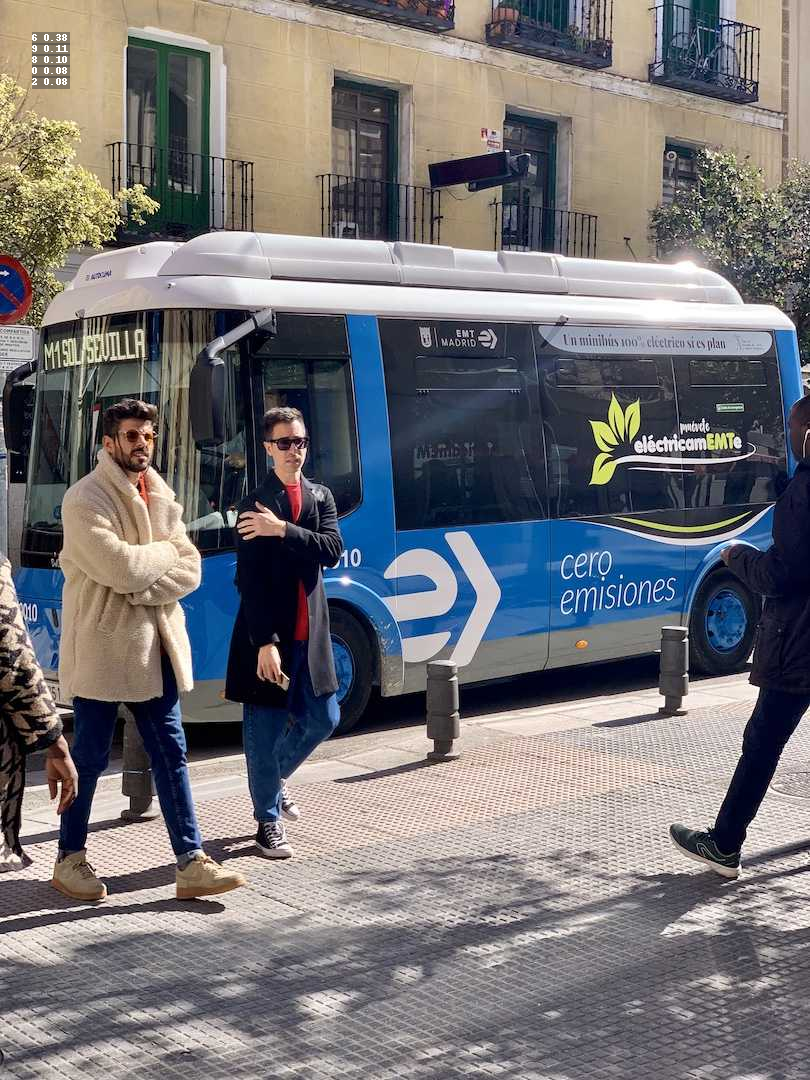

In [19]:
# Load YOLO11n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-cls.pt')  # load a pretrained YOLO classification model
model.train(data='mnist160', epochs=3)  # train the model
result_classification = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
result_classification
result_classification[0].show()  # plot the results

## 4. Pose

YOLO11 _pose_ models use the `-pose` suffix, i.e. `yolo11n-pose.pt` and are pretrained on COCO Keypoints. See [Pose Docs](https://docs.ultralytics.com/tasks/pose/) for full details.

New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8-pose.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, op

train: Scanning /work/01_DETECTION/datasets/coco8-pose/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 619.8±163.6 MB/s, size: 39.1 KB)


val: Scanning /work/01_DETECTION/datasets/coco8-pose/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to /work/01_DETECTION/ultralytics/runs/pose/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)


2025/05/12 07:11:03 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/12 07:11:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/05/12 07:11:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/05/12 07:11:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


MLflow: logging run_id(177d0b03784d4a8894f3a82b78513c11) to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /work/01_DETECTION/ultralytics/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /work/01_DETECTION/ultralytics/runs/pose/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.959G      1.303      3.159     0.4371      1.012      1.559         11        640: 100%|██████████| 1/1 [00:00<00:00, 19.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.94it/s]

                   all          4         14      0.806       0.89      0.907      0.718      0.982      0.643      0.763      0.354

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



        2/3     0.959G      1.671      4.093     0.3854      1.163      1.562          9        640: 100%|██████████| 1/1 [00:00<00:00, 22.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.13it/s]

                   all          4         14      0.805      0.883      0.907      0.713      0.981      0.643      0.763       0.36



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.959G      1.688      1.929     0.2946       1.33      1.814          8        640: 100%|██████████| 1/1 [00:00<00:00, 21.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.74it/s]

                   all          4         14      0.825      0.857      0.907      0.709      0.981      0.643      0.757      0.356



3 epochs completed in 0.001 hours.
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/pose/train2/weights/last.pt, 6.1MB
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/pose/train2/weights/best.pt, 6.1MB

Validating /work/01_DETECTION/ultralytics/runs/pose/train2/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n-pose summary (fused): 109 layers, 2,866,468 parameters, 0 gradients, 7.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 59.06it/s]


                   all          4         14      0.805      0.888      0.907      0.711      0.981      0.643      0.763       0.36
Speed: 0.3ms preprocess, 1.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /work/01_DETECTION/ultralytics/runs/pose/train2
MLflow: results logged to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /work/10_OTHERS/colab_keti_inference_code/bus.jpg: 640x480 4 persons, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


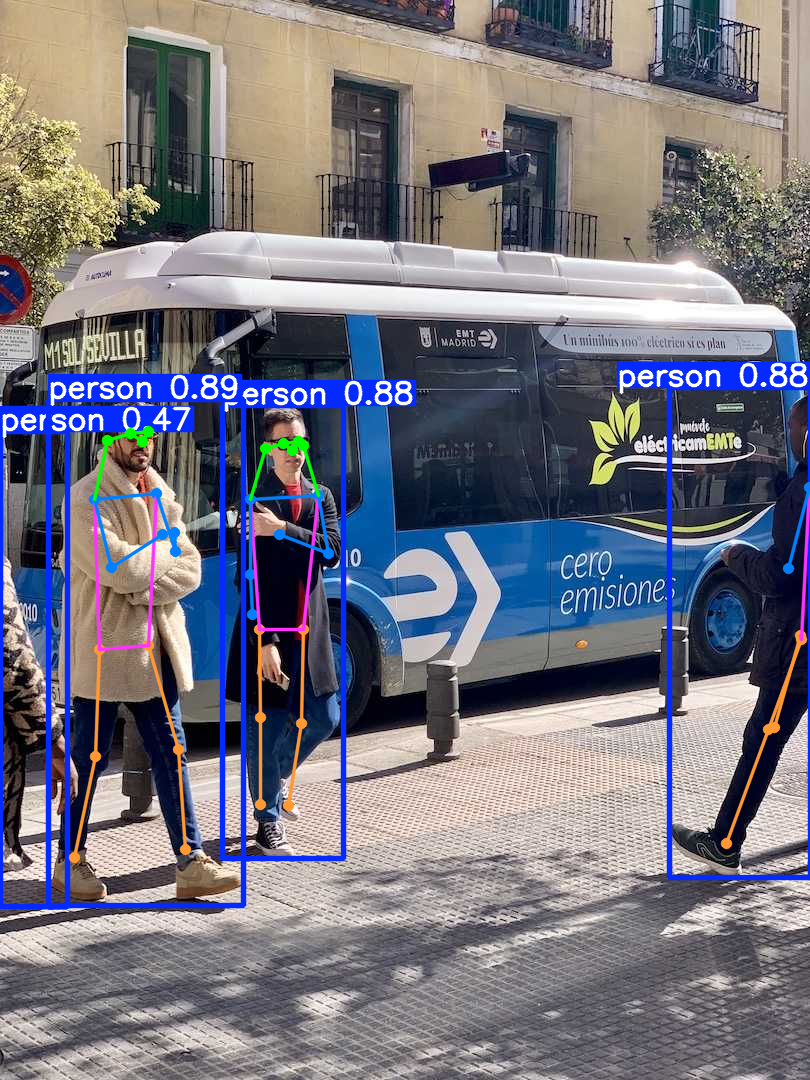

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9910, 0.9282, 0.9873, 0.4178, 0.9336, 0.9907, 0.9976, 0.9236, 0.9885, 0.8998, 0.9745, 0.9970, 0.9985, 0.9950, 0.9975, 0.9791, 0.9861],
        [0.1598, 0.1607, 0.0462, 0.2405, 0.0496, 0.6846, 0.2280, 0.6117, 0.1008, 0.4618, 0.1226, 0.7317, 0.5002, 0.7620, 0.5446, 0.5968, 0.4294],
        [0.9894, 0.9332, 0.9796, 0.5537, 0.9105, 0.9953, 0.9977, 0.9472, 0.9784, 0.9140, 0.9490, 0.9984, 0.9988, 0.9956, 0.9966, 0.9786, 0.9815],
        [0.0983, 0.0382, 0.0645, 0.0379, 0.0701, 0.2024, 0.2400, 0.2491, 0.3148, 0.3302, 0.3610, 0.2712, 0.2936, 0.2330, 0.2493, 0.1368, 0.1396]], device='cuda:0')
data: tensor([[[1.4263e+02, 4.4192e+02, 9.9104e-01],
         [1.4818e+02, 4.3152e+02, 9.2817e-01],
         [1.3079e+02, 4.3346e+02, 9.8726e-01],
         [0.0000e+00, 0.0000e+00, 4.1783e-01],
         [1.0715e+02, 4.4079e+02, 9.3361e-01],
         [1.5692e+02, 4.9325e+02, 9.9069e-01],
         [9.4238e+01, 4.9943e+02, 9.9758e-

In [21]:
# Load YOLO11n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-pose.pt')  # load a pretrained YOLO pose model
model.train(data='coco8-pose.yaml', epochs=3)  # train the model
result_pose = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
result_pose
result_pose[0].show()  # plot the results
result_pose[0].keypoints  # get the keypoints

## 4. Oriented Bounding Boxes (OBB)

YOLO11 _OBB_ models use the `-obb` suffix, i.e. `yolo11n-obb.pt` and are pretrained on the DOTA dataset. See [OBB Docs](https://docs.ultralytics.com/tasks/obb/) for full details.

New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dota8.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimiz

train: Scanning /work/01_DETECTION/datasets/dota8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1392.1±841.9 MB/s, size: 97.3 KB)


val: Scanning /work/01_DETECTION/datasets/dota8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to /work/01_DETECTION/ultralytics/runs/obb/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)


2025/05/12 07:12:28 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/12 07:12:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/05/12 07:12:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/05/12 07:12:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


MLflow: logging run_id(c59f8d97f11b484a9597deccdd6169f7) to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /work/01_DETECTION/ultralytics/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to /work/01_DETECTION/ultralytics/runs/obb/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      1.97G     0.7448     0.6204      1.609         72       1024: 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.45it/s]

                   all          4          8      0.947          1      0.995      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      2.15G     0.8812     0.5451       1.49        143       1024: 100%|██████████| 1/1 [00:00<00:00, 15.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.22it/s]


                   all          4          8      0.945          1      0.995      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.33G     0.8588     0.5294      1.599        160       1024: 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.78it/s]

                   all          4          8      0.957          1      0.995      0.804



3 epochs completed in 0.001 hours.
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/obb/train2/weights/last.pt, 5.9MB
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/obb/train2/weights/best.pt, 5.9MB

Validating /work/01_DETECTION/ultralytics/runs/obb/train2/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n-obb summary (fused): 109 layers, 2,656,648 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.92it/s]


                   all          4          8      0.946          1      0.995      0.804
      baseball diamond          3          4      0.903          1      0.995       0.85
      basketball court          1          3      0.971          1      0.995      0.866
     soccer ball field          1          1      0.964          1      0.995      0.697
Speed: 0.6ms preprocess, 2.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /work/01_DETECTION/ultralytics/runs/obb/train2
MLflow: results logged to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'

Found https://ultralytics.com/images/boats.jpg locally at boats.jpg
image 1/1 /work/10_OTHERS/colab_keti_inference_code/boats.jpg: 576x1024 None4.0ms
Speed: 2.1ms preprocess, 4.0ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)


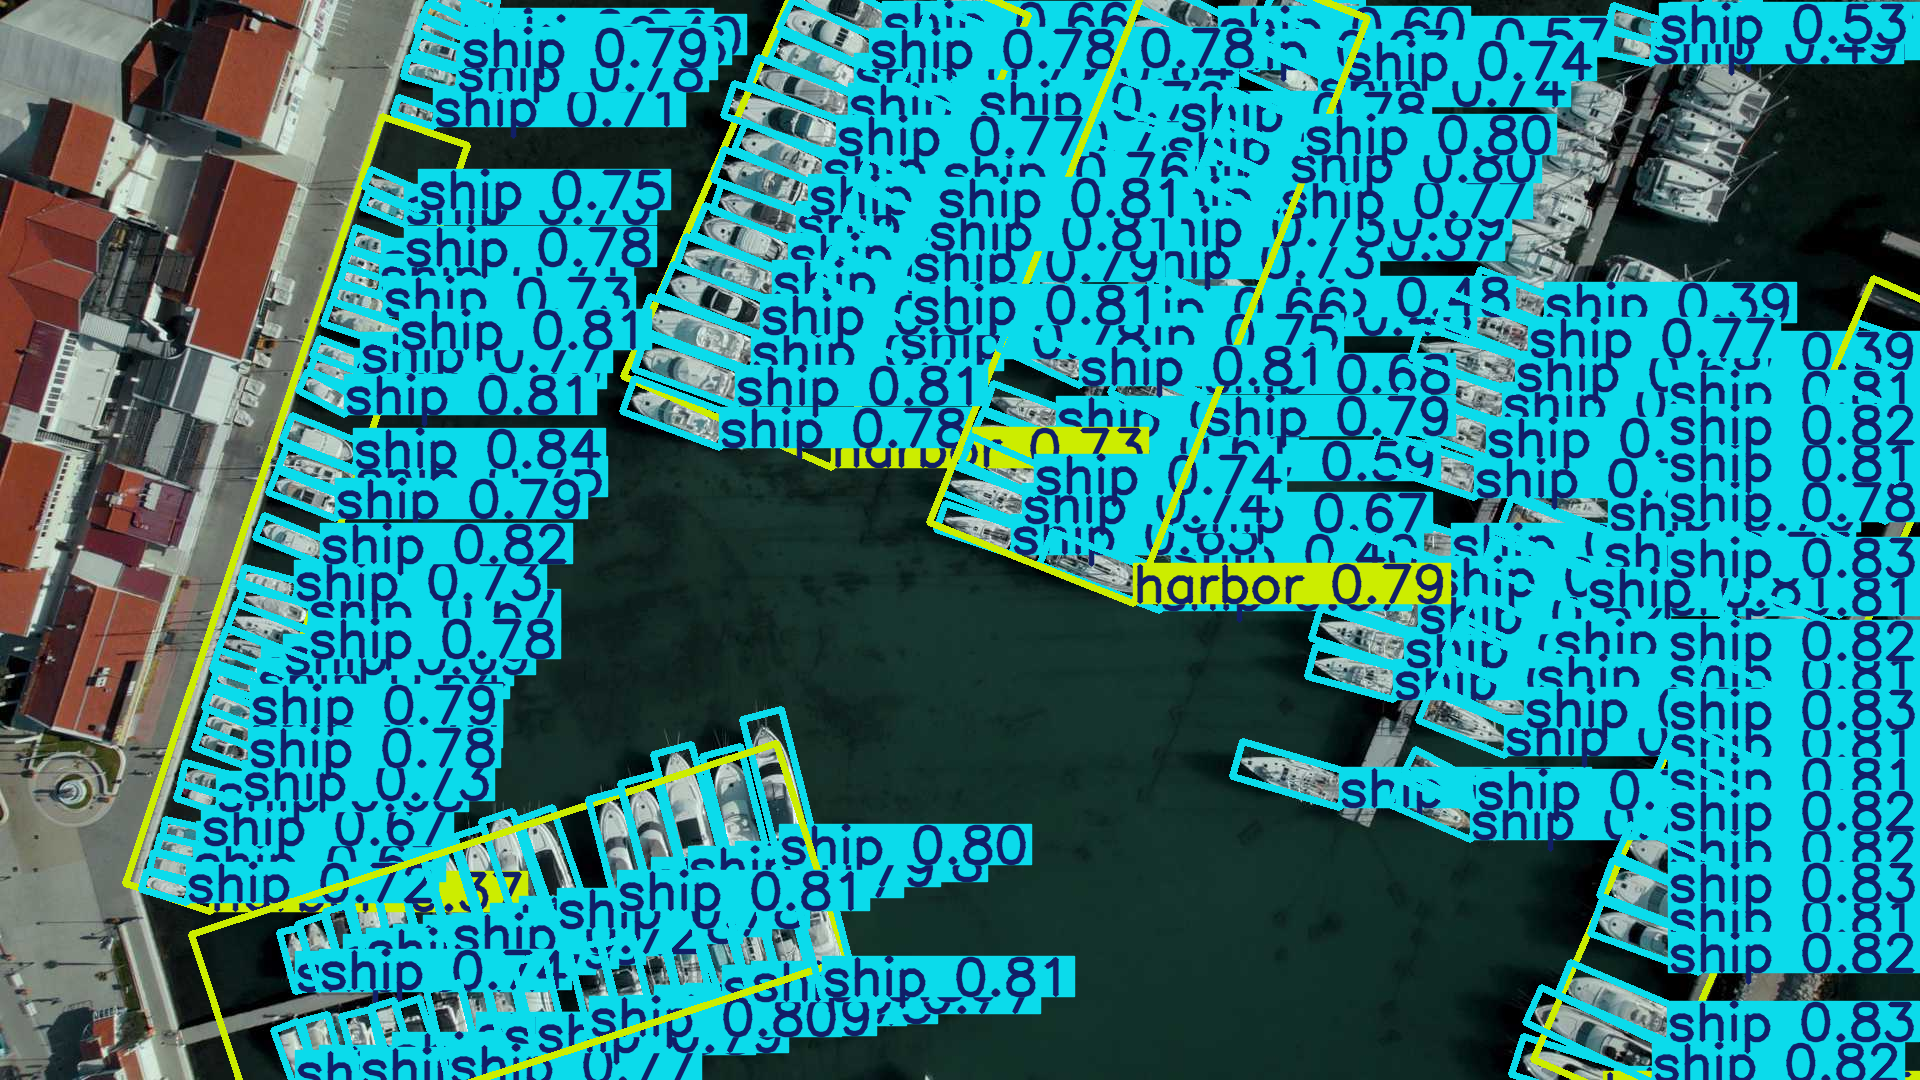

In [23]:
# Load YOLO11n-obb, train it on DOTA8 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-obb.pt')  # load a pretrained YOLO OBB model
model.train(data='dota8.yaml', epochs=3)  # train the model
result_obb = model('https://ultralytics.com/images/boats.jpg')  # predict on an image
result_obb
result_obb[0].show()  # plot the results
